### Example of how to use the Finder class to find sources in a FITS image.

In [38]:
import numpy as np

from continunet.finder import Finder

from matplotlib import pyplot as plt

In [61]:
finder = Finder("/Users/bi19158/Code/continunet/continunet/example_image.fits")
sources_default = finder.find(generate_maps=True)

Loading FITS image from /Users/bi19158/Code/continunet/continunet/example_image.fits...
Pre-processing image...
Image dimensions cannot be processed by the network, rehsaping image from (512, 512) to (512, 512).
Predicting source segmentation using pre-trained model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Generating segmentation map...
Using default thresholding method (scikit-image triangle threshold).
Labelling sources...
Calculating source properties...
Correcting source catalogue...
ContinUNet found 1400 sources in 2.55 seconds.


In [62]:
sources_default

,y_location_cutout,x_location_cutout,orientation,major_axis,minor_axis,flux_density_uncorrected,label,x_location,y_location,right_acsension,declination,area,position_angle,correction_factor,flux_density
0,1.125000,54.125000,1.463117,4.683927,2.358141,8.882924e-08,1,54.125000,1.125000,0.015576,-30.017044,8.675006,173.830456,3.600886,3.198640e-07
1,3.782609,77.228261,1.515013,25.065565,6.740327,6.538761e-08,2,77.228261,3.782609,0.013784,-30.016866,132.693109,176.803832,1.475657,9.648969e-08
5,1.800000,23.600000,0.321751,3.098387,1.788854,4.576242e-08,6,23.600000,1.800000,0.017942,-30.016998,4.353118,108.434949,4.488639,2.054110e-07
6,7.666667,36.022222,-0.297612,12.195093,6.330230,1.115624e-07,7,36.022222,7.666667,0.016979,-30.016605,60.630967,72.948105,1.191277,1.329017e-07
7,1.250000,42.000000,1.570796,2.828427,1.732051,1.633555e-08,8,42.000000,1.250000,0.016516,-30.017035,3.847649,180.000000,11.635788,1.900770e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,508.923077,96.076923,1.468406,5.779165,2.873684,2.174790e-07,3234,96.076923,508.923077,0.012318,-29.982951,13.043495,174.133458,2.279139,4.956649e-07
3237,509.166667,339.500000,0.832874,4.811792,2.098145,3.419271e-08,3238,339.500000,509.166667,359.993450,-29.982935,7.929252,137.720166,3.396527,1.161365e-07
3238,509.571429,454.142857,-1.363543,5.056836,2.781102,8.266491e-08,3239,454.142857,509.571429,359.984564,-29.982908,11.045509,11.874747,5.342107,4.416048e-07
3240,509.333333,39.333333,-0.785398,2.309401,1.333333,2.620701e-08,3241,39.333333,509.333333,0.016717,-29.982923,2.418399,45.000000,5.364143,1.405782e-07


In [63]:
image = finder.image_object.data
model_map = finder.model_map
residuals = finder.residuals
# TODO: fix segmentation map so it only includes cleaned sources
segmentation_map = finder.segmentation_map

Text(0.5, 1.0, 'Residuals')

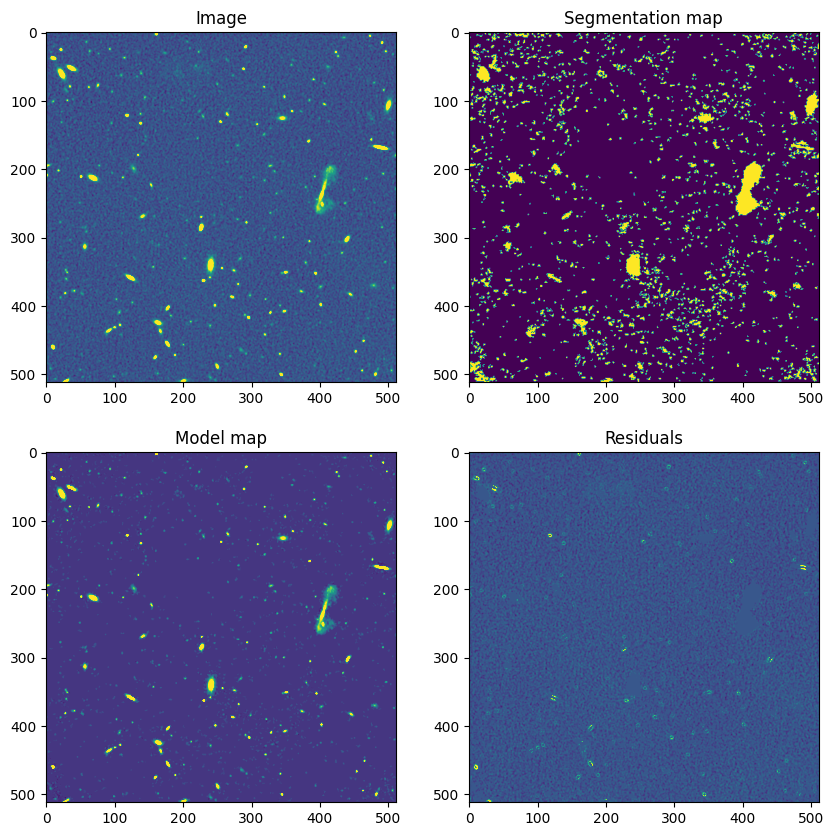

In [64]:
# plot image, segmentation map, model map, residuals
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(image, vmax=1e-6)
ax[0, 0].set_title("Image")
ax[0, 1].imshow(segmentation_map)
ax[0, 1].set_title("Segmentation map")
ax[1, 0].imshow(model_map, vmax=1e-6)
ax[1, 0].set_title("Model map")
ax[1, 1].imshow(residuals, vmax=1e-6)
ax[1, 1].set_title("Residuals")


## Using a different threshold

In [65]:
sources_otsu = finder.find(generate_maps=True, threshold="otsu")
sources_otsu

Loading FITS image from /Users/bi19158/Code/continunet/continunet/example_image.fits...
Pre-processing image...
Image dimensions cannot be processed by the network, rehsaping image from (512, 512) to (512, 512).
Predicting source segmentation using pre-trained model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Generating segmentation map...
Using Otsu thresholding method.
Labelling sources...
Calculating source properties...
Correcting source catalogue...
ContinUNet found 484 sources in 1.37 seconds.


,y_location_cutout,x_location_cutout,orientation,major_axis,minor_axis,flux_density_uncorrected,label,x_location,y_location,right_acsension,declination,area,position_angle,correction_factor,flux_density
3,2.285714,161.000000,1.570796,3.023716,2.799417,4.853233e-06,4,161.000000,2.285714,0.007289,-30.016967,6.648113,180.000000,5.186056,2.516914e-05
8,3.500000,172.000000,-1.017222,3.236068,1.236068,3.475115e-08,9,172.000000,3.500000,0.006436,-30.016885,3.141593,31.717474,3.194373,1.110081e-07
10,4.818182,473.818182,-0.785398,3.813850,3.672547,1.707088e-06,11,473.818182,4.818182,359.983033,-30.016796,11.000715,45.000000,1.394459,2.380465e-06
27,7.750000,435.666667,1.225128,4.167620,3.631322,7.711491e-07,28,435.666667,7.750000,359.985991,-30.016599,11.886192,160.194656,1.246249,9.610439e-07
29,9.000000,36.000000,-0.785398,3.703280,2.138090,1.040286e-07,30,36.000000,9.000000,0.016981,-30.016515,6.218741,45.000000,1.763549,1.834594e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,507.285714,505.000000,1.570796,3.023716,2.799417,9.863229e-08,1238,505.000000,507.285714,359.980622,-29.983060,6.648113,180.000000,1.993973,1.966701e-07
1238,509.312500,29.875000,-1.084162,10.278151,2.355233,8.730775e-06,1239,29.875000,509.312500,0.017450,-29.982925,19.012476,27.882090,3.801885,3.319341e-05
1240,508.363636,247.090909,0.263033,4.346130,3.067356,4.694961e-07,1241,247.090909,508.363636,0.000613,-29.982989,10.470244,105.070693,1.475454,6.927198e-07
1244,508.500000,96.500000,-0.785398,2.000000,2.000000,7.017900e-08,1245,96.500000,508.500000,0.012286,-29.982980,3.141593,45.000000,3.105704,2.179552e-07


In [67]:
image = finder.image_object.data
model_map = finder.model_map
residuals = finder.residuals
# TODO: fix segmentation map so it only includes cleaned sources
segmentation_map = finder.segmentation_map

Text(0.5, 1.0, 'Residuals')

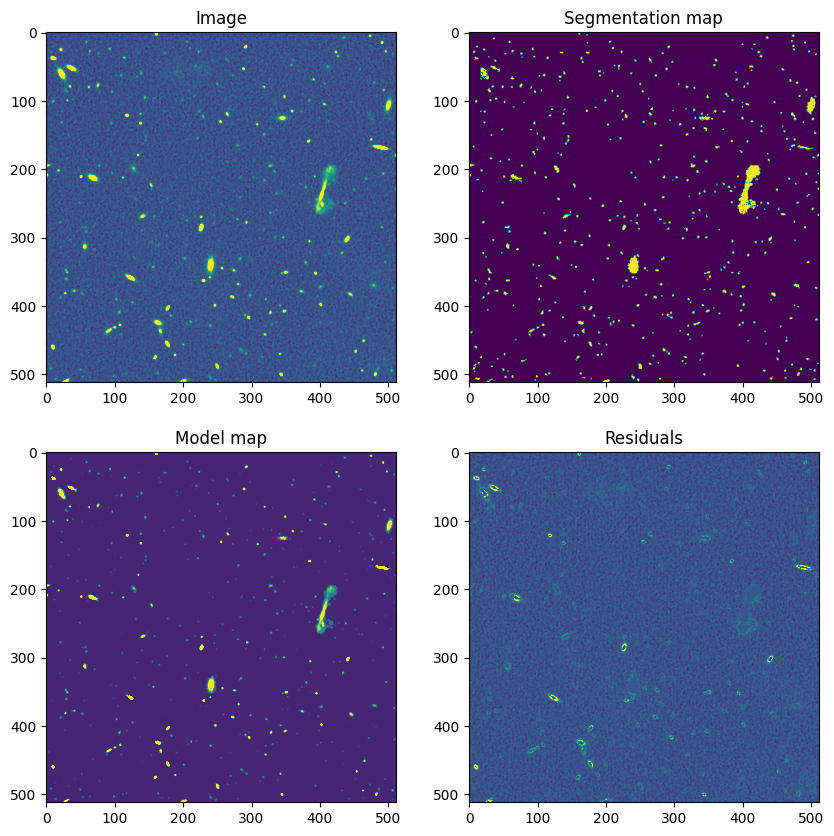

In [68]:
# plot image, segmentation map, model map, residuals
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(image, vmax=1e-6)
ax[0, 0].set_title("Image")
ax[0, 1].imshow(segmentation_map)
ax[0, 1].set_title("Segmentation map")
ax[1, 0].imshow(model_map, vmax=1e-6)
ax[1, 0].set_title("Model map")
ax[1, 1].imshow(residuals, vmax=1e-6)
ax[1, 1].set_title("Residuals")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.hist(sources_default.flux_density, bins=np.logspace(-10, -5, 50), histtype="step", color="springgreen", linewidth=2, alpha=0.8, label="Default threshold")
ax.hist(sources_otsu.flux_density, bins=np.logspace(-10, -3, 50), histtype="step", color="orchid", linewidth=2, alpha=0.8, label="Otsu threshold")
ax.set_xscale("log")
